<a href="https://colab.research.google.com/github/Emanoeljunior/Control-System/blob/master/Sistemas_de_2a_Ordem_e_Superior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando bibliotecas

In [ ]:
!pip install control

In [ ]:
# Bibliotecas para uso de imagens
from IPython.display import Image
# Outras bibliotecas 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import inverse_laplace_transform
from scipy.integrate import odeint
from sympy import *
import control
from IPython.display import display, Math, Latex

#Exercício 1

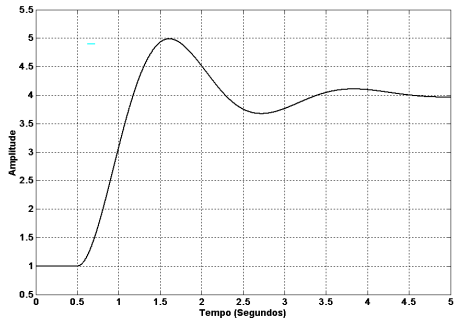

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab6/ex1.png", width=500)

##Analisando o gráfico

In [ ]:
tp1 = 1.1
cm = 5-1
cf = 4-1
wd1= np.pi/tp1
os1=100*(cm-cf)/cf
z1 = - np.log(os1/100)/np.sqrt(np.pi**2 + np.log(os1/100)**2)
wn1= wd1/(np.sqrt(1-z1**2))

print("wd = ",wd1)
print("%OS = ",os1)
print("zeta = ",z1)
print("wn = ",wn1)
print("b = ",wn1**2)
print("a = ",2*wn1*z1)

wd =  2.855993321445266
%OS =  33.333333333333336
zeta =  0.3300974204390833
wn =  3.0255869401077145
b =  9.154176332150362
a =  1.9974768884874716


Obtemos:

${T_p = 1,1s \rightarrow \omega_d = \dfrac{\pi}{T_p} =\dfrac{\pi}{1,1} = 2.855993 rad/s}$

${\%OS = \dfrac{c_{máx}- c_{final}}{c_{final}} \times 100 =  \dfrac{ 4- 3}{3} \times 100 = 33,33\%}$

${\zeta = \dfrac{-ln(\%OS/100)} {\sqrt{\pi^2 + ln^2(\%OS/100)}} = \dfrac{-ln(33,33\%/100)} {\sqrt{\pi^2 + ln^2(33,33\%/100)}} =0,3301}$

${G = \dfrac{4-1}{2} = \dfrac{3}{2}}$

${\omega_n = \dfrac{\omega_d}{\sqrt{ 1 - \zeta^2} } = 3.0256 rad/s}$

${\dfrac{C(s)}{R(s)} = G \dfrac{\omega_n^2}{s^2 + 2\zeta \omega_n s + \omega_n^2} = \dfrac{3}{2}\dfrac{9.154}{s^2 + 1,997 s +9.154}}$

##Plotando os gráficos

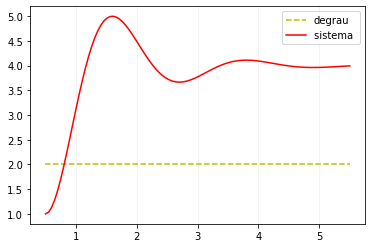

In [ ]:
#Definindo o sistema
num1=[9.154*(3/2)]
den1=[1, 1.997, 9.154]

#Definindo degrau
num_step = [2]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

sys_num = signal.convolve(num1,num_step)
sys_den = signal.convolve(den1,den_step)

t = np.linspace(0,5,100)

t,y1 = signal.impulse(signal.TransferFunction(sys_num,sys_den),0,T=t)

y1 = y1 + 1

t,y_stp = signal.impulse(step,0,t) 

plt.plot(t+0.5,y_stp, "--y", label='degrau')
plt.plot(t+0.5, y1,  "-r", label='sistema ')
plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()

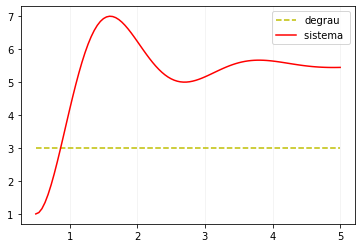

In [ ]:
#Definindo o sistema
num1=[9.154*(3/2)]
den1=[1, 1.997, 9.154]

#Definindo degrau
num_step = [3]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

sys_num = signal.convolve(num1,num_step)
sys_den = signal.convolve(den1,den_step)

t = np.linspace(0,4.5,100)

t,y1 = signal.impulse(signal.TransferFunction(sys_num,sys_den),0,T=t)

y1 = y1 + 1

t,y_stp = signal.impulse(step,0,t) 

plt.plot(t+0.5,y_stp, "--y", label='degrau')
plt.plot(t+0.5, y1,  "-r", label='sistema ')
plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()

In [ ]:
100*(6-4.5)/4.5

33.333333333333336

${T_p = 1,1 s}$

${\%OS = \dfrac{6 - 4.5}{4.5} \times 100 = 33,33 \% }$

#Exercício 2 





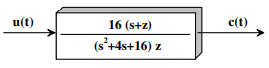

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab6/ex2.png", width=300)

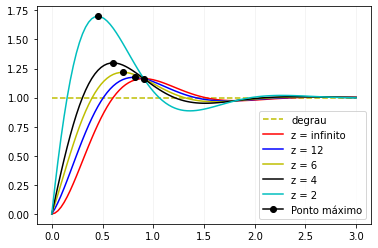

Cmax1 =  1.1630272907056192 Tp =  0.9090909090909092
Cmax2 =  1.1742303521382291 Tp =  0.8181818181818182
Cmax3 =  1.2170755881377398 Tp =  0.696969696969697
Cmax4 =  1.2984309742412719 Tp =  0.6060606060606061
Cmax5 =  1.6993505734704828 Tp =  0.4545454545454546
polos = [-2.+3.46410162j -2.-3.46410162j]


In [ ]:
num_step = [1]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

#Definindo o sistema
num1=[16]
den1=[1, 4, 16]

z1=12
z2=6
z3=4
z4=2
sys1_num = signal.convolve(num1,[1,z1])
sys2_num = signal.convolve(num1,[1,z2])
sys3_num = signal.convolve(num1,[1,z3])
sys4_num = signal.convolve(num1,[1,z4])

sys1_den = signal.convolve(den1,[z1])
sys2_den = signal.convolve(den1,[z2])
sys3_den = signal.convolve(den1,[z3])
sys4_den = signal.convolve(den1,[z4])


t = np.linspace(0,3,100)

t,y1 = signal.step(signal.TransferFunction(num1,den1),0,t)
t,y2 = signal.step(signal.TransferFunction(sys1_num,sys1_den),0,t)
t,y3 = signal.step(signal.TransferFunction(sys2_num,sys2_den),0,t)
t,y4 = signal.step(signal.TransferFunction(sys3_num,sys3_den),0,t)
t,y5 = signal.step(signal.TransferFunction(sys4_num,sys4_den),0,t)


t,y_stp = signal.impulse(step,0,t) 

plt.plot(t,y_stp, "--y", label='degrau')
plt.plot(t, y1,  "-r", label='z = infinito ')
plt.plot(t, y2,  "-b", label='z = 12 ')
plt.plot(t, y3,  "-y", label='z = 6 ')
plt.plot(t, y4,  "-k", label='z = 4 ')
plt.plot(t, y5,  "-c", label='z = 2 ')


plt.plot(t.take(y1.argmax()),y1.take(y1.argmax()), "-k", marker="o",label='Ponto máximo')
plt.plot(t.take(y2.argmax()),y2.take(y2.argmax()), "-k", marker="o")
plt.plot(t.take(y3.argmax()),y3.take(y3.argmax()), "-k", marker="o")
plt.plot(t.take(y4.argmax()),y4.take(y4.argmax()), "-k", marker="o")
plt.plot(t.take(y5.argmax()),y5.take(y5.argmax()), "-k", marker="o")

plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()

print("Cmax1 = ", y1.max(), "Tp = ", t[y1.argmax()])
print("Cmax2 = ", y2.max(), "Tp = ", t[y2.argmax()])
print("Cmax3 = ", y3.max(), "Tp = ", t[y3.argmax()])
print("Cmax4 = ", y4.max(), "Tp = ", t[y4.argmax()])
print("Cmax5 = ", y5.max(), "Tp = ", t[y5.argmax()])
print("polos =",control.pole(control.TransferFunction(sys1_num,sys1_den)))

O tempo de pico diminui e o valor de sobre sinal aumenta conforme o polo se aproxima da parte real dos polos

##Equações para análise do sistema

${G(s)=\dfrac{\omega_n^2}{s^2 + 2\zeta \omega_n + \omega_n^2}}$

${T_s = \dfrac{4}{\zeta \omega_n}}$

${T_p = \dfrac{\pi}{ \omega_d}}$

${\omega_n = \dfrac{\omega_d}{\sqrt{ 1 - \zeta^2} }}$

${\zeta = \dfrac{-ln(\%OS/100)} {\sqrt{\pi^2 + ln^2(\%OS/100)}}}$

${\%OS = \dfrac{c_{máx} - c_{final}}{c_{final}}}$




##Calculando os parâmetros a partir do gráfico

In [ ]:
#calulando tp
tp1 = t[y1.argmax()]
tp2 = t[y2.argmax()]
tp3 = t[y3.argmax()]
tp4 = t[y4.argmax()]
tp5 = t[y5.argmax()]

#calculando wd
wd1=np.pi/t[y1.argmax()]
wd2=np.pi/t[y2.argmax()]
wd3=np.pi/t[y3.argmax()]
wd4=np.pi/t[y4.argmax()]
wd5=np.pi/t[y5.argmax()]

#calculando %OS
os1 = (y1.max()-1)*100
os2 = (y2.max()-1)*100
os3 = (y3.max()-1)*100
os4 = (y4.max()-1)*100
os5 = (y5.max()-1)*100

#Calculando zeta
z1 = - np.log(os1/100)/np.sqrt(np.pi**2 + np.log(os1/100)**2)
z2 = - np.log(os2/100)/np.sqrt(np.pi**2 + np.log(os2/100)**2)
z3 = - np.log(os3/100)/np.sqrt(np.pi**2 + np.log(os3/100)**2)
z4 = - np.log(os4/100)/np.sqrt(np.pi**2 + np.log(os4/100)**2)
z5 = - np.log(os5/100)/np.sqrt(np.pi**2 + np.log(os5/100)**2)

#Calculando wn
wn1= wd1/(np.sqrt(1-z1**2))
wn2= wd2/(np.sqrt(1-z2**2))
wn3= wd3/(np.sqrt(1-z3**2))
wn4= wd4/(np.sqrt(1-z4**2))
wn5= wd5/(np.sqrt(1-z5**2))

#Calculando Ts
ts1= 4/(z1*wn1)
ts2= 4/(z2*wn2)
ts3= 4/(z3*wn3)
ts4= 4/(z4*wn4)
ts5= 4/(z5*wn5)

#Calculando Tr
tr1 = t.take(y1.searchsorted(0.9))-t.take(y1.searchsorted(0.1))
tr2 = t.take(y2.searchsorted(0.9))-t.take(y2.searchsorted(0.1))
tr3 = t.take(y3.searchsorted(0.9))-t.take(y3.searchsorted(0.1))
tr4 = t.take(y4.searchsorted(0.9))-t.take(y4.searchsorted(0.1))
tr5 = t.take(y5.searchsorted(0.9))-t.take(y5.searchsorted(0.1))

#Printando os valores
print("Sistema 1: Ts = ","{:f}".format(ts1), "Tp = ","{:f}".format(tp1), "Tr = ", "{:f}".format(tr1) , "wd = ","{:f}".format(wd1) ,"%OS = ","{:f}".format(os1), "zeta = ","{:f}".format(z1) , "wn = ","{:f}".format(wn1))
print("Sistema 2: Ts = ", "{:f}".format(ts2), "Tp = ","{:f}".format(tp2), "Tr = ", "{:f}".format(tr2) , "wd = ","{:f}".format(wd2) ,"%OS = ","{:f}".format(os2), "zeta = ","{:f}".format(z2) , "wn = ","{:f}".format(wn2))
print("Sistema 3: Ts = ", "{:f}".format(ts3), "Tp = ","{:f}".format(tp3), "Tr = ", "{:f}".format(tr3) , "wd = ","{:f}".format(wd3) ,"%OS = ","{:f}".format(os3), "zeta = ","{:f}".format(z3) , "wn = ","{:f}".format(wn3))
print("Sistema 4: Ts = ", "{:f}".format(ts4), "Tp = ","{:f}".format(tp4), "Tr = ", "{:f}".format(tr4) , "wd = ","{:f}".format(wd4) ,"%OS = ","{:f}".format(os4), "zeta = ","{:f}".format(z4) , "wn = ","{:f}".format(wn4))
print("Sistema 5: Ts = ", "{:f}".format(ts5), "Tp = ","{:f}".format(tp5), "Tr = ", "{:f}".format(tr5) , "wd = ","{:f}".format(wd5) ,"%OS = ","{:f}".format(os5), "zeta = ","{:f}".format(z5) , "wn = ","{:f}".format(wn5))


Sistema 1: Ts =  2.004790 Tp =  0.909091 Tr =  0.393939 wd =  3.455752 %OS =  16.302729 zeta =  0.500008 wn =  3.990380
Sistema 2: Ts =  1.872937 Tp =  0.818182 Tr =  0.363636 wd =  3.839724 %OS =  17.423035 zeta =  0.486078 wn =  4.393703
Sistema 3: Ts =  1.825114 Tp =  0.696970 Tr =  0.303030 wd =  4.507503 %OS =  21.707559 zeta =  0.437273 wn =  5.012074
Sistema 4: Ts =  2.004804 Tp =  0.606061 Tr =  0.242424 wd =  5.183628 %OS =  29.843097 zeta =  0.359215 wn =  5.554354
Sistema 5: Ts =  5.084357 Tp =  0.454545 Tr =  0.121212 wd =  6.911504 %OS =  69.935057 zeta =  0.113098 wn =  6.956136


#Exercicio 3


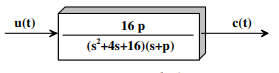

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab6/ex3.png", width=300)

##Plotando o gráfico

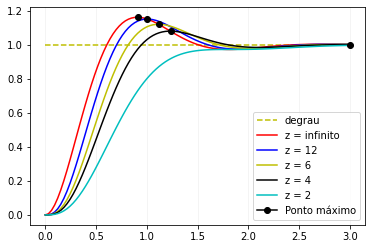

Cmax1 =  1.1630272907056192 Tp =  0.9090909090909092
Cmax2 =  1.1524743007853875 Tp =  1.0
Cmax3 =  1.1216797491965924 Tp =  1.1212121212121213
Cmax4 =  1.0813671144517563 Tp =  1.2424242424242424
Cmax5 =  0.9974047301657839 Tp =  3.0


In [ ]:
num_step = [1]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

#Definindo o sistema
num1=[16]
den1=[1, 4, 16]

z1=12
z2=6
z3=4
z4=2
sys1_num = signal.convolve(num1,[z1])
sys2_num = signal.convolve(num1,[z2])
sys3_num = signal.convolve(num1,[z3])
sys4_num = signal.convolve(num1,[z4])

sys1_den = signal.convolve(den1,[1,z1])
sys2_den = signal.convolve(den1,[1,z2])
sys3_den = signal.convolve(den1,[1,z3])
sys4_den = signal.convolve(den1,[1,z4])


t = np.linspace(0,3,100)

t,y1 = signal.step(signal.TransferFunction(num1,den1),0,t)
t,y2 = signal.step(signal.TransferFunction(sys1_num,sys1_den),0,t)
t,y3 = signal.step(signal.TransferFunction(sys2_num,sys2_den),0,t)
t,y4 = signal.step(signal.TransferFunction(sys3_num,sys3_den),0,t)
t,y5 = signal.step(signal.TransferFunction(sys4_num,sys4_den),0,t)


t,y_stp = signal.impulse(step,0,t) 

plt.plot(t,y_stp, "--y", label='degrau')
plt.plot(t, y1,  "-r", label='z = infinito ')
plt.plot(t, y2,  "-b", label='z = 12 ')
plt.plot(t, y3,  "-y", label='z = 6 ')
plt.plot(t, y4,  "-k", label='z = 4 ')
plt.plot(t, y5,  "-c", label='z = 2 ')

plt.plot(t.take(y1.argmax()),y1.take(y1.argmax()), "-k", marker="o",label='Ponto máximo')
plt.plot(t.take(y2.argmax()),y2.take(y2.argmax()), "-k", marker="o")
plt.plot(t.take(y3.argmax()),y3.take(y3.argmax()), "-k", marker="o")
plt.plot(t.take(y4.argmax()),y4.take(y4.argmax()), "-k", marker="o")
plt.plot(t.take(y5.argmax()),y5.take(y5.argmax()), "-k", marker="o")

plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()

print("Cmax1 = ", y1.max(), "Tp = ", t[y1.argmax()])
print("Cmax2 = ", y2.max(), "Tp = ", t[y2.argmax()])
print("Cmax3 = ", y3.max(), "Tp = ", t[y3.argmax()])
print("Cmax4 = ", y4.max(), "Tp = ", t[y4.argmax()])
print("Cmax5 = ", y5.max(), "Tp = ", t[y5.argmax()])





Conforme o polo adicionado vai se aproximando da parte real dos polos do sistema o pico diminui, e o tempo de pico aumenta.

##Equções para a análise do sistema

${G(s)=\dfrac{\omega_n^2}{s^2 + 2\zeta \omega_n + \omega_n^2}}$

${T_s = \dfrac{4}{\zeta \omega_n}}$

${T_p = \dfrac{\pi}{ \omega_d}}$

${\omega_n = \dfrac{\omega_d}{\sqrt{ 1 - \zeta^2} }}$

${\zeta = \dfrac{-ln(\%OS/100)} {\sqrt{\pi^2 + ln^2(\%OS/100)}}}$

${\%OS = \dfrac{c_{máx} - c_{final}}{c_{final}}}$




##Calculando os parâmetros a partir do gráfico

In [ ]:
#calulando tp
tp1 = t[y1.argmax()]
tp2 = t[y2.argmax()]
tp3 = t[y3.argmax()]
tp4 = t[y4.argmax()]
tp5 = t[y5.argmax()]

#calculando wd
wd1=np.pi/t[y1.argmax()]
wd2=np.pi/t[y2.argmax()]
wd3=np.pi/t[y3.argmax()]
wd4=np.pi/t[y4.argmax()]
wd5=np.pi/t[y5.argmax()]

#calculando %OS
os1 = (y1.max()-1)*100
os2 = (y2.max()-1)*100
os3 = (y3.max()-1)*100
os4 = (y4.max()-1)*100
os5 = (y5.max()-1)*100

#Calculando zeta
z1 = - np.log(os1/100)/np.sqrt(np.pi**2 + np.log(os1/100)**2)
z2 = - np.log(os2/100)/np.sqrt(np.pi**2 + np.log(os2/100)**2)
z3 = - np.log(os3/100)/np.sqrt(np.pi**2 + np.log(os3/100)**2)
z4 = - np.log(os4/100)/np.sqrt(np.pi**2 + np.log(os4/100)**2)
z5 = - np.log(os5/100)/np.sqrt(np.pi**2 + np.log(os5/100)**2)

#Calculando wn
wn1= wd1/(np.sqrt(1-z1**2))
wn2= wd2/(np.sqrt(1-z2**2))
wn3= wd3/(np.sqrt(1-z3**2))
wn4= wd4/(np.sqrt(1-z4**2))
wn5= wd5/(np.sqrt(1-z5**2))

#Calculando Ts
ts1= 4/(z1*wn1)
ts2= 4/(z2*wn2)
ts3= 4/(z3*wn3)
ts4= 4/(z4*wn4)
ts5= 4/(z5*wn5)

#Calculando Tr
tr1 = t.take(y1.searchsorted(0.9))-t.take(y1.searchsorted(0.1))
tr2 = t.take(y2.searchsorted(0.9))-t.take(y2.searchsorted(0.1))
tr3 = t.take(y3.searchsorted(0.9))-t.take(y3.searchsorted(0.1))
tr4 = t.take(y4.searchsorted(0.9))-t.take(y4.searchsorted(0.1))
tr5 = t.take(y5.searchsorted(0.9))-t.take(y5.searchsorted(0.1))

#Printando os valores
print("Sistema 1: Ts = ","{:f}".format(ts1), "Tp = ","{:f}".format(tp1), "Tr = ", "{:f}".format(tr1) , "wd = ","{:f}".format(wd1) ,"%OS = ","{:f}".format(os1), "zeta = ","{:f}".format(z1) , "wn = ","{:f}".format(wn1))
print("Sistema 2: Ts = ", "{:f}".format(ts2), "Tp = ","{:f}".format(tp2), "Tr = ", "{:f}".format(tr2) , "wd = ","{:f}".format(wd2) ,"%OS = ","{:f}".format(os2), "zeta = ","{:f}".format(z2) , "wn = ","{:f}".format(wn2))
print("Sistema 3: Ts = ", "{:f}".format(ts3), "Tp = ","{:f}".format(tp3), "Tr = ", "{:f}".format(tr3) , "wd = ","{:f}".format(wd3) ,"%OS = ","{:f}".format(os3), "zeta = ","{:f}".format(z3) , "wn = ","{:f}".format(wn3))
print("Sistema 4: Ts = ", "{:f}".format(ts4), "Tp = ","{:f}".format(tp4), "Tr = ", "{:f}".format(tr4) , "wd = ","{:f}".format(wd4) ,"%OS = ","{:f}".format(os4), "zeta = ","{:f}".format(z4) , "wn = ","{:f}".format(wn4))
print("Sistema 5: Ts = ", "{:f}".format(ts5), "Tp = ","{:f}".format(tp5), "Tr = ", "{:f}".format(tr5) , "wd = ","{:f}".format(wd5) ,"%OS = ","{:f}".format(os5), "zeta = ","{:f}".format(z5) , "wn = ","{:f}".format(wn5))

Sistema 1: Ts =  2.004790 Tp =  0.909091 Tr =  0.393939 wd =  3.455752 %OS =  16.302729 zeta =  0.500008 wn =  3.990380
Sistema 2: Ts =  1.872937 Tp =  0.818182 Tr =  0.363636 wd =  3.839724 %OS =  17.423035 zeta =  0.486078 wn =  4.393703
Sistema 3: Ts =  1.825114 Tp =  0.696970 Tr =  0.303030 wd =  4.507503 %OS =  21.707559 zeta =  0.437273 wn =  5.012074
Sistema 4: Ts =  2.004804 Tp =  0.606061 Tr =  0.242424 wd =  5.183628 %OS =  29.843097 zeta =  0.359215 wn =  5.554354
Sistema 5: Ts =  5.084357 Tp =  0.454545 Tr =  0.121212 wd =  6.911504 %OS =  69.935057 zeta =  0.113098 wn =  6.956136


#Exercicio 4

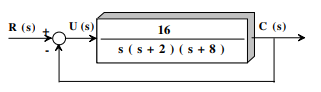

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab6/ex4.png", width=300)

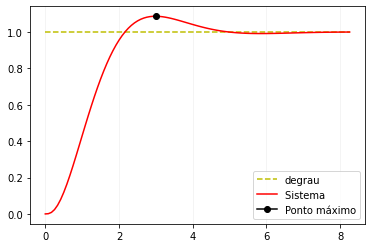

Cmax1 =  1.0874031853819732 Tp =  3.004399392068401


In [ ]:
num_step = [1]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

#Definindo o sistema
num1=[16]
den1= signal.convolve(signal.convolve([1,2],[1,8]),[1,0])
sys = control.TransferFunction(num1,den1)
t = np.linspace(0,3,100)

t,y1 = control.step_response(control.feedback(sys,sys2=1,sign=-1))

t,y_stp = signal.impulse(step,0,t) 

plt.plot(t,y_stp, "--y", label='degrau')
plt.plot(t, y1,  "-r", label='Sistema ')

plt.plot(t.take(y1.argmax()),y1.take(y1.argmax()), "-k", marker="o",label='Ponto máximo')


plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()

print("Cmax1 = ", y1.max(), "Tp = ", t[y1.argmax()])


##Calculando os parâmetros a partir do gráfico

In [ ]:
#calulando tp
tp1 = t[y1.argmax()]

#calculando wd
wd1=np.pi/t[y1.argmax()]

#calculando %OS
os1 = (y1.max()-1)*100

#Calculando zeta
z1 = - np.log(os1/100)/np.sqrt(np.pi**2 + np.log(os1/100)**2)

#Calculando wn
wn1= wd1/(np.sqrt(1-z1**2))

#Calculando Ts
ts1= 4/(z1*wn1)

#Calculando Tr
tr1 = t.take(y1.searchsorted(0.9))-t.take(y1.searchsorted(0.1))

#Calculando parâmetros
a = 2*z1*wn1
b = wn1**2
#Printando os valores
print("Sistema 1: Ts = ","{:f}".format(ts1), "Tp = ","{:f}".format(tp1), "Tr = ", "{:f}".format(tr1) , "wd = ","{:f}".format(wd1) ,"%OS = ","{:f}".format(os1), "zeta = ","{:f}".format(z1) , "wn = ","{:f}".format(wn1))
print("a = ", "{:f}".format(a), "b = ","{:f}".format(b))

Sistema 1: Ts =  4.930856 Tp =  3.004399 Tr =  1.418744 wd =  1.045664 %OS =  8.740319 zeta =  0.612963 wn =  1.323438
a =  1.622436 b =  1.751488


##Aproximação de segunda ordem

${\dfrac{C(s)}{R(s)} = \dfrac{b}{s^2 + as + b} =\dfrac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}} = \dfrac{1,7515}{s^2 + 1,6224s + 1,7515}$

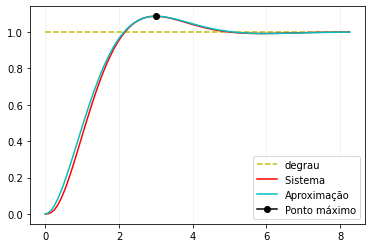

Cmax1 =  1.0874031853819732 Tp =  3.004399392068401


In [ ]:
num_step = [1]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

#Definindo o sistema
num1=[16]
den1= signal.convolve(signal.convolve([1,2],[1,8]),[1,0])
sys = control.TransferFunction(num1,den1)

num2=[b]
den2= [1,a,b]


t = np.linspace(0,3,100)

t,y1 = control.step_response(control.feedback(sys,sys2=1,sign=-1))
t,y2 = signal.step(signal.TransferFunction(num2,den2),0,t)

t,y_stp = signal.impulse(step,0,t) 

plt.plot(t,y_stp, "--y", label='degrau')
plt.plot(t, y1,  "-r", label='Sistema ')
plt.plot(t, y2,  "-c", label='Aproximação')

plt.plot(t.take(y1.argmax()),y1.take(y1.argmax()), "-k", marker="o",label='Ponto máximo')


plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()

print("Cmax1 = ", y1.max(), "Tp = ", t[y1.argmax()])

A aproximação considerada é adequada. Pois, observando o gráfico, é possível perceber que a resposta do sistema e da aprooximação ficaram bem próximas uma da outra.